# 감성분석 

## 1. 블랙 박스 게시글 csv 파일 load 데이터

In [2]:
import pandas as pd
import numpy as np

In [3]:
black_box = pd.read_csv('data/black_box_final.csv',sep=None)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [349]:
black_box.tail()

,brand,title,content
2096,팅크웨어/아이나비,[2채널LCD무],아침출근길에 재부팅 2번이나뜨네요....오히려 업그레이드전이 쫌덜한거같았는데...아...
2097,팅크웨어/아이나비,[2채널LCD무],어제 집앞에 차를 대놓고 집에있다가 나왔는데\n차 오른쪽 앞바퀴 쪽에 검게 쫙 글어...
2098,팅크웨어/아이나비,[2채널LCD무],FXD 900 오늘 혼자서 설치해봤는데요\n 접지를 잘못 연결하는 바람에 한참 고민...
2099,팅크웨어/아이나비,[1채널],"안녕하세요.\n 아이나비 블랙클레어 1 , 몇 년 잘 사용하고 있는 사람입니다.\n..."
2100,팅크웨어/아이나비,[2채널LCD무],유라이브 알바트로스2를 구입해서 불량이 생겨 fxd900마하로 교환하여 쓰고 있습니...


## 2. 전처리

### 2-1. 데이터 프레임 나누기(브랜드 별로)

In [393]:
itro = black_box[2:437]

In [394]:
cnc = black_box[438:856]

In [395]:
fine = black_box[858:1280]

In [396]:
qr = black_box[1282:1704]

In [397]:
inavi = black_box[1704:]

In [399]:
brand_list  = ['itro', 'cnc' , 'fine' , 'qr', 'inavi']

총 데이터 갯수

In [400]:
black_box2 = black_box.dropna(axis=0, how='any')
len(black_box2)

2054

### 2-2.content 가 null 인 경우 처리 ( 동영상만 있었거나 사진만 올린경우 )

In [401]:
def null_ck(df):
    print (df.isnull().sum())
    

In [402]:
itro = itro.dropna(axis=0, how='any')

In [403]:
cnc = cnc.dropna(axis=0, how='any')

In [404]:
fine = fine.dropna(axis=0, how='any')

In [405]:
qr = qr.dropna(axis=0, how='any')

In [406]:
inavi = inavi.dropna(axis=0, how='any')

### 2-3. 불용어 제거 

In [407]:
from konlpy.tag import Twitter
tw = Twitter()
stop_words = open('data/stopwords-ko.txt').read().split('\n')

def normalize(df):
    global text
    text = []
    try:
        for i in df['content']:
            nouns = tw.nouns(i)
            filtered_nouns = [ noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
            text.append(filtered_nouns)
    except:
        print (type(i),i)
    return text

In [408]:
def result(text):
    result_lst = []
    for i in text:
        result_lst.extend(i)
    print (len(result_lst))
    return result_lst

In [409]:
def save_txt(result_lst, brand):
    with open('data/'+brand+'_normalized.txt', 'w') as f:
        f.write(' '.join(result_lst))
    return result_lst

### 2-4. 브랜드 별로 불용어 제거 후 단어 추출

In [410]:
itro_normal = save_txt(result(normalize(itro)),'itro')

14761


In [411]:
qr_normal = save_txt(result(normalize(qr)),'qr')

15066


In [412]:
cnc_normal = save_txt(result(normalize(cnc)),'cnc')

24416


In [413]:
fine_normal = save_txt(result(normalize(fine)),'fine')

17084


In [414]:
inavi_normal = save_txt(result(normalize(inavi)),'inavi')

16914


In [415]:
black_normal = save_txt(result(normalize(black_box2)),'black_box')

90689


In [416]:
def black_pos(df): 
    black_pos = []
    for i in df:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i)
    print (len(adj_lst))
    return adj_lst 

동사, 명사, 형용사만

In [417]:
def _pos(df): 
    black_pos = []
    for i in df['content']:
        black_pos.append(tw.pos(i))


    adj_lst = []
    for j in black_pos:
        for i in j:
            if i[1] == 'Adjective':
                adj_lst.append(i[0])
            elif i[1] == 'Noun':
                adj_lst.append(i[0])
            elif i[1] == 'Verb':
                adj_lst.append(i[0])
                
    print (len(adj_lst))
    return adj_lst  

In [418]:
inavi_pos = _pos(inavi)

31997


In [419]:
cnc_pos = _pos(cnc)

45014


In [420]:
qr_pos = _pos(qr)

29131


In [421]:
fine_pos = _pos(fine)

32736


In [422]:
itro_pos = _pos(itro)

28534


In [423]:
all_pos = _pos(black_box2)

171339


### 2-5. 분석 대상 단어 선정하기¶
브랜드별 게시글을 분석할 때 블랙박스와 어느 정도 관련된 단어만을 대상으로 하기 위해 분석 대상 단어를 선정한다. 
전체 블랙박스 내용 중 일정 수 이상 출현한 단어만을 분석 대상 단어로 정하였다.

In [424]:
full_counter2 = Counter(all_pos)

target_words2 = [key for key, value in full_counter2.most_common(500)]

In [425]:
print (target_words2)

['영상', '입니', '제품', '녹화', '후방', '주차', '블랙박스', '되', '있', '설정', '했', '카메라', '후', '아이', '시간', '문제', '있는', '시', '주행', '모드', '분', '하는', '것', '할', '합', '사용', '전원', '메모리', '로드', '된', '전방', '파일', '차량', '좋', '뷰', '정도', '이', '화면', '수', '때', '블박', '기능', '요', '전', '잘', '되는', '화질', '케이블', '펌웨어', '제', '경우', '충격', '파', '카드', '일', '아이나비', '되어', '같은', '좀', '를', '확인', '됩', '배터리', '다시', '더', '저장', '구매', '구입', '채널', '하면', '가', '로', '아니', '다른', '상태', '부분', '연결', '년', '있어', '및', '되었', '루카스', '작동', '안되', '포맷', '정상', '업데이트', '이상', '기', '중', '없', '한', '차', '감지', '는', '쓰', '모델', '초', '저', '시동', '보니', '그냥', '체험', '모션', '재부팅', '증상', '이런', '프레임', '개', '없는', '월', '이벤트', '상', '등', '하고', '오늘', '있으', '재생', '메모리카드', '전압', '거', '터치', '글', '상시', '설치', '계속', '혹시', '하여', '장', '교체', '보면', '장착', '의', '않', '선', '알', '또', '때문', '그런', '야간', '이번', '전용', '문의', '해야', '썬팅', '같', '차단', '하나', '건지', '동작', '바로', '뷰어', '안', '현상', '안녕하세', '용량', '도', '사진', '한번', '들', '될', '센터', '달', '본체', '방법', '있다', '시전', '해서', '너무', '해', '정보', '추가', '번',

In [426]:
from collections import Counter

full_counter = Counter(black_normal)

target_words = [key for key, value in full_counter.most_common(500)]

분석 대상 단어 500개를 출현 빈도 순으로 나열

In [427]:
print (target_words)

['영상', '제품', '녹화', '후방', '주차', '블랙박스', '설정', '카메라', '문제', '주행', '모드', '사용', '전원', '메모리', '로드', '전방', '파일', '차량', '정도', '화면', '블박', '기능', '화질', '케이블', '펌웨어', '경우', '충격', '카드', '아이나비', '확인', '배터리', '다시', '저장', '구매', '구입', '채널', '상태', '부분', '연결', '루카스', '작동', '포맷', '정상', '업데이트', '모델', '시동', '그냥', '체험', '모션', '재부팅', '증상', '프레임', '이벤트', '감지', '오늘', '재생', '메모리카드', '전압', '터치', '상시', '계속', '교체', '설치', '장착', '때문', '야간', '전용', '문의', '썬팅', '차단', '동작', '뷰어', '현상', '용량', '한번', '사진', '센터', '본체', '방법', '시전', '너무', '정보', '추가', '후기', '밝기', '고객', '기본', '변경', '일반', '아래', '인식', '가요', '지금', '불량', '버튼', '현재', '회원', '동영상', '답변', '지원', '전면', '사고', '자동', '가격', '기존', '운전', '가지', '생각', '번호판', '센서', '교환', '보조', '소리', '처음', '개선', '수리', '상황', '운행', '블랙', '기기', '차이', '박스', '멘트', '사용자', '촬영', '무상', '속도', '테스트', '방식', '포멧', '만원', '버전', '패스', '거치', '발생', '주간', '차선', '전화', '업그레이드', '택배', '시스템', '내용', '알림', '어제', '오류', '정말', '보고', '민감', '서비스', '음성', '시큐리티', '하니', '부팅', '원래', '이후', '표시', '초기', '방전', '재원', '보정', '움직임', '안전

## 3. TF-IDF로 브랜드 별 게시글 특징 잡아내기

In [428]:
print (brand_list)

['itro', 'cnc', 'fine', 'qr', 'inavi']


In [429]:
counters = []

In [430]:
def count_word(lst):
    counter = Counter(lst)
    print (len(counter))
    global counters
    counters.append(counter)
    return counter

In [431]:
itro_cnt = count_word(itro_normal)

2268


In [432]:
cnc_cnt = count_word(cnc_normal)

3046


In [433]:
fine_cnt = count_word(fine_normal)

2887


In [434]:
qr_cnt = count_word(qr_normal)

2399


In [435]:
inavi_cnt = count_word(inavi_normal)

2965


In [436]:
import math

def tf(word, counter):
    return counter[word]

def idf(word, corpus):
    num_containing = sum(1 for counter in corpus if counter[word] > 0)
    return math.log(len(corpus) / (1 + num_containing))

def tfidf(word, counter, corpus):
    """TF-IDF 점수를 구한다."""
    #print (tf(word, counter) * idf(word, corpus))
    return tf(word, counter) * idf(word, corpus)

In [488]:
def tfidf_scores(_cnt ,target_words,counters):
    scores = {}
    for word in target_words:
        score = tfidf(word, _cnt, counters)
        scores[word] = score
     
    brand_name = ['재원','아이나비','오메가','알파','탱크','디펜더','로드','엔씨','활동','공동','큐비아','비아']
    new_dict = {}
    for k,v in scores.items():
        if v != 0.0:
            if k in brand_name:
                pass
            else:
                new_dict[k] = v
    #scores_sorted = sorted(scores.items(), key=lambda x:x[1], reverse=True)
    #return scores_sorted
    return new_dict

In [489]:
def tfidf_cloud(_cnt , target_words,counters , name):
    """브랜드별로 블랙박스에 대한 분석 대상 단어들의 TF-IDF 점수를 워드 클라우드로 그린다."""
    scores = tfidf_scores(_cnt , target_words,counters)
    tfidf_wc = WC.generate_from_frequencies(scores)
    tfidf_wc.to_file('data/' + name  + '.png')

## 4. 브랜드별로 워드 클라우드 그리기

In [490]:
from wordcloud import WordCloud

In [491]:
font_file = 'resources/Daum_SemiBold.ttf'
WC = WordCloud(font_path=font_file, width=600, height=600)

### 4-1. 아이트로닉스

In [492]:
tfidf_cloud(itro_cnt , target_words, counters , 'itro')

In [493]:
from PIL import Image

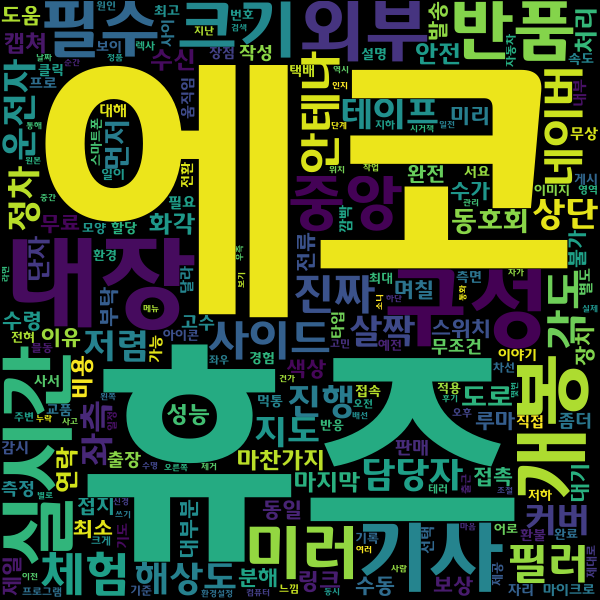

In [494]:
itro_img = Image.open('data/itro.png')
itro_img

### 4-2. 재원씨엔씨

In [495]:
def print_img(brand):
    image= Image.open('data/'+brand+'.png')
    image

In [496]:
tfidf_cloud(cnc_cnt , target_words, counters , 'cnc')

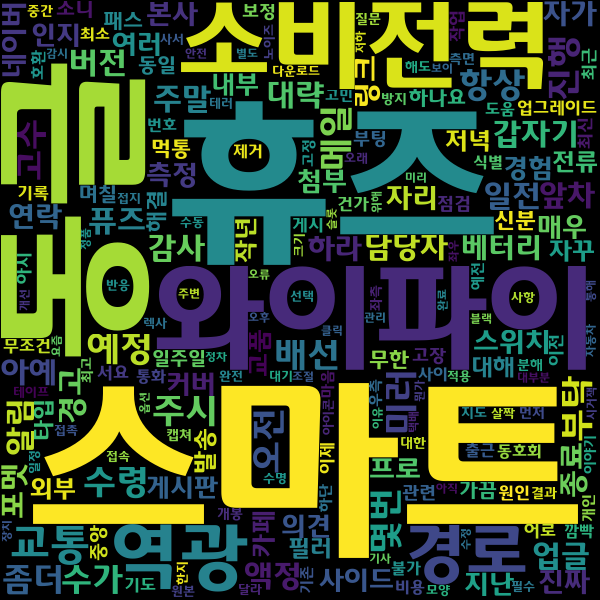

In [497]:
cnc_img = Image.open('data/cnc.png')
cnc_img

### 4-3. 큐알온텍

In [498]:
tfidf_cloud(qr_cnt , target_words, counters , 'qr')

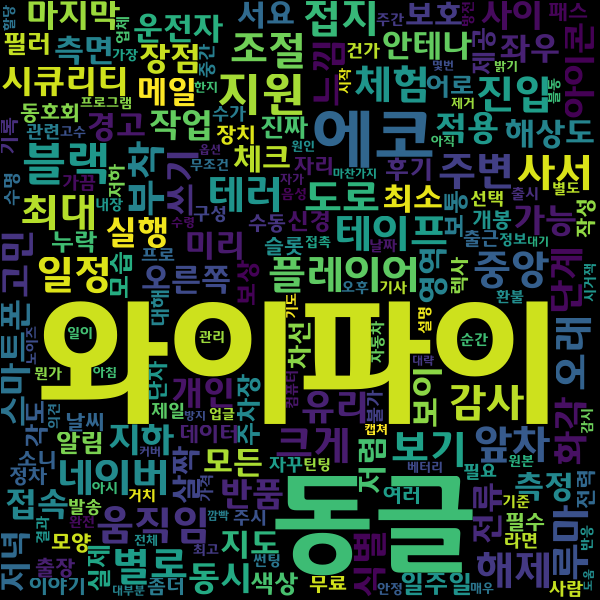

In [499]:
qr_img = Image.open('data/qr.png')
qr_img

### 4-4. 아이나비

In [500]:
tfidf_cloud(inavi_cnt , target_words, counters , 'inavi')

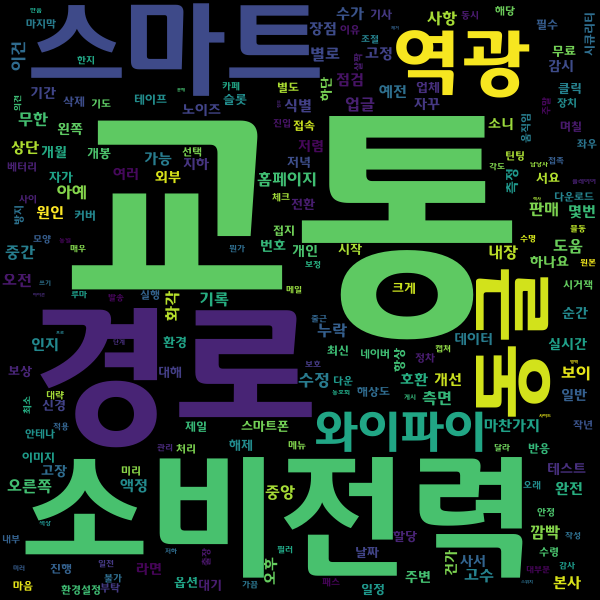

In [501]:
inavi_img = Image.open('data/inavi.png')
inavi_img

### 4-5. 파인디지털

In [502]:
tfidf_cloud(fine_cnt , target_words, counters , 'fine')

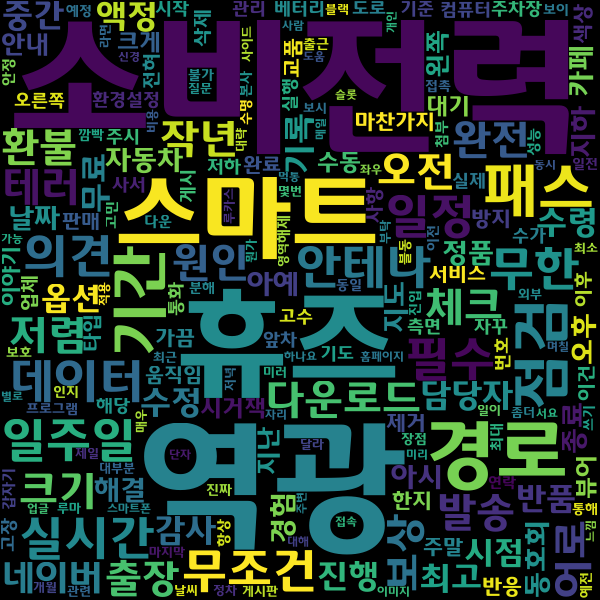

In [503]:
fine_img = Image.open('data/fine.png')
fine_img

<br>

## 5. LDA

> 데이터의 집합에 대한 확률 모델로 주제별 특정 단어를 생성한 확률을 통해 가중치를 만들어 냄

> 속성별 키워드 선정

![](data/lda.png)

<br>

## 감성분석

> (주)로드킬의 블랙박소 화질, 성능, 가성비, 전력소비, 서비스를 종합적으로 평가

![](data/load.png)

<br>

## T-SNE

> 비선형 차원축소, 시각화를 위해 주로 사용

> 데이터 포인트들 사이의 유사도를 통해 데이터의 패천을 찾고 고차원의 데이터를 저차원 공간으로 매핑

> 블랙박스 제품별과 긍정과 부정단어 군집화

![](data/t-sne.png)